Modelo de implementacion de una tienda en linea

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm

# Configuración
num_simulations = 5000
costo_referencia = 40000

# Función de distribución normal truncada
def normal_truncada(media, std, min_val, max_val, size=1):
    a, b = (min_val - media) / std, (max_val - media) / std
    return truncnorm.rvs(a, b, loc=media, scale=std, size=size)

# ----- Modelo base: Triangular -----
def simulacion_base():
    dominio_hosting = np.random.triangular(500, 1000, 2000)
    diseño_ui = np.random.triangular(3000, 5000, 8000)
    desarrollo_web = np.random.triangular(10000, 15000, 25000)
    pasarela_pago = np.random.triangular(1000, 1500, 3000)
    marketing = np.random.triangular(2000, 4000, 8000)
    capacitacion = np.random.triangular(1500, 3000, 5000)
    return sum([dominio_hosting, diseño_ui, desarrollo_web, pasarela_pago, marketing, capacitacion])

# ----- Modelo alternativo: con distribuciones normales -----
def simulacion_alternativa():
    dominio_hosting = np.random.triangular(500, 1000, 2000)
    diseño_ui = normal_truncada(5000, 1000, 3000, 8000)
    desarrollo_web = normal_truncada(15000, 3000, 10000, 25000)
    pasarela_pago = np.random.triangular(1000, 1500, 3000)
    marketing = normal_truncada(4000, 1000, 2000, 8000)
    capacitacion = np.random.triangular(1500, 3000, 5000)
    return sum([dominio_hosting, diseño_ui[0], desarrollo_web[0], pasarela_pago, marketing[0], capacitacion])

# Ejecutar simulaciones
resultados_base = [simulacion_base() for _ in range(num_simulations)]
resultados_alt = [simulacion_alternativa() for _ in range(num_simulations)]

# Graficar comparación
plt.figure(figsize=(10,6))
sns.histplot(resultados_base, bins=50, kde=True, color="skyblue", label="Triangular (base)")
sns.histplot(resultados_alt, bins=50, kde=True, color="orange", label="Normal truncada (alternativa)", alpha=0.6)
plt.axvline(costo_referencia, color='red', linestyle='--', label='Costo de referencia')
plt.title("Análisis de sensibilidad: comparación de distribuciones")
plt.xlabel("Costo Total (MXN)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Estadísticas clave
print("=== Modelo base (triangular) ===")
print(f"Promedio: ${np.mean(resultados_base):,.2f}")
print(f"Percentil 90: ${np.percentile(resultados_base, 90):,.2f}")

print("\n=== Modelo alternativo (normal truncada) ===")
print(f"Promedio: ${np.mean(resultados_alt):,.2f}")
print(f"Percentil 90: ${np.percentile(resultados_alt, 90):,.2f}")


Costo promedio: $32,874.87
Costo mínimo: $23,536.03
Costo máximo: $44,497.27
Percentil 90: $37,900.13


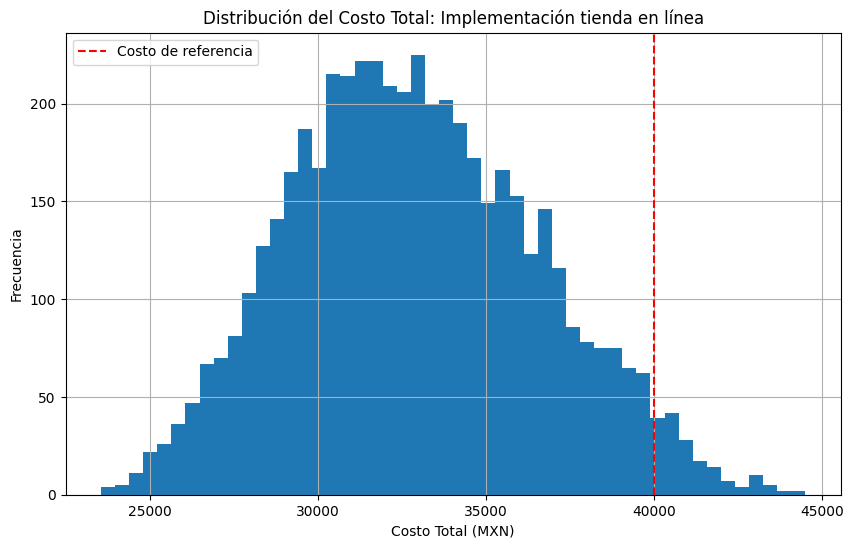

In [19]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 5000
costo_referencia = 40000  # Presupuesto estimado

# Función para simular un escenario del modelo
def simulacion_base():
    dominio_hosting = np.random.triangular(500, 1000, 2000)
    diseño_ui = np.random.triangular(3000, 5000, 8000)
    desarrollo_web = np.random.triangular(10000, 15000, 25000)
    pasarela_pago = np.random.triangular(1000, 1500, 3000)
    marketing = np.random.triangular(2000, 4000, 8000)
    capacitacion = np.random.triangular(1500, 3000, 5000)
    return sum([dominio_hosting, diseño_ui, desarrollo_web, pasarela_pago, marketing, capacitacion])

resultados = []

for _ in range(num_simulations):
    iteracion = roll_dice()
    costo_total = sum(iteracion)
    resultados.append(costo_total)

# convertimos a array para análisar
resultados = np.array(resultados)
#estadistica importante
print(f"Costo promedio: ${resultados.mean():,.2f}")
print(f"Costo mínimo: ${resultados.min():,.2f}")
print(f"Costo máximo: ${resultados.max():,.2f}")
print(f"Percentil 90: ${np.percentile(resultados, 90):,.2f}")

# Gráfico de resultados
plt.figure(figsize=(10,6))
plt.hist(resultados, bins=50)
plt.axvline(costo_referencia, color='red', linestyle='--', label='Costo de referencia')
plt.title("Distribución del Costo Total: Implementación tienda en línea")
plt.xlabel("Costo Total (MXN)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid()
plt.show()


In [20]:
total_muestras = resultados.__len__()
costo_ok = [x for x in resultados if x < costo_referencia] #lista de las muestras menores al costo de referencia
num_costo_ok = costo_ok.__len__()
prob_costo_ref = num_costo_ok / total_muestras
print(f'La probabilidad de que el costo sea menor al costo de referencia es: {prob_costo_ref*100:.2f} %')


La probabilidad de que el costo sea menor al costo de referencia es: 96.88 %


Analisis de sensibilidad con diferentes tipos de distribuciones

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


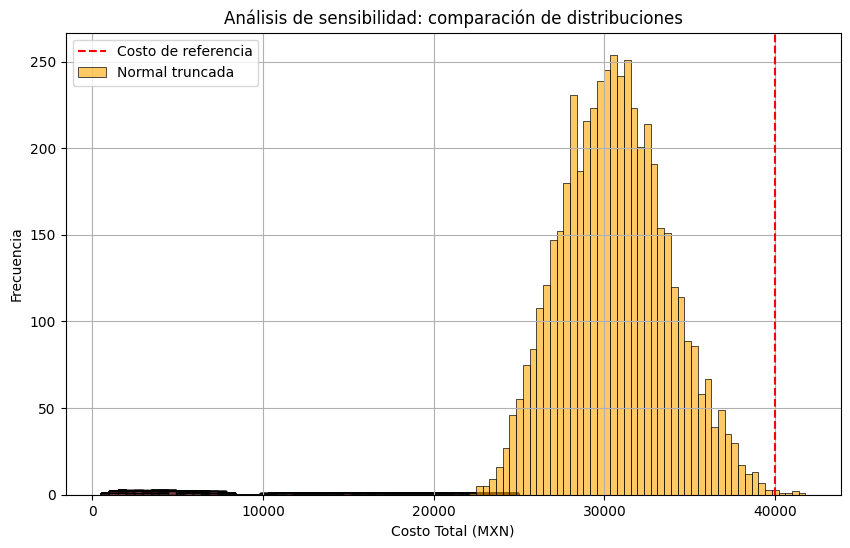

In [21]:
import seaborn as sns
from scipy.stats import truncnorm

# Configuración
num_simulations = 5000
costo_referencia = 40000

# Función de distribución normal truncada
def normal_truncada(media, std, min_val, max_val, size=1):
    a, b = (min_val - media) / std, (max_val - media) / std
    return truncnorm.rvs(a, b, loc=media, scale=std, size=size)

def simulacion_alternativa():
    dominio_hosting = np.random.triangular(500, 1000, 2000)
    diseño_ui = normal_truncada(5000, 1000, 3000, 8000)
    desarrollo_web = normal_truncada(15000, 3000, 10000, 25000)
    pasarela_pago = np.random.triangular(1000, 1500, 3000)
    marketing = normal_truncada(4000, 1000, 2000, 8000)
    capacitacion = np.random.triangular(1500, 3000, 5000)
    return sum([dominio_hosting, diseño_ui[0], desarrollo_web[0], pasarela_pago, marketing[0], capacitacion])

resultados_base = [roll_dice() for _ in range(num_simulations)]
resultados_alt = [simulacion_alternativa() for _ in range(num_simulations)]

#comparación
plt.figure(figsize=(10,6))
sns.histplot(resultados_base, bins=50, color="skyblue")
sns.histplot(resultados_alt, bins=50, color="orange", label="Normal truncada", alpha=0.6)
plt.axvline(costo_referencia, color='red', linestyle='--', label='Costo de referencia')
plt.title("Análisis de sensibilidad: comparación de distribuciones")
plt.xlabel("Costo Total (MXN)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid()
plt.show()


In [18]:
# Estadísticas clave
print("Modelo triangular")
print(f"Promedio: ${np.mean(resultados_base):,.2f}")
print(f"Percentil 90: ${np.percentile(resultados_base, 90):,.2f}")

print("\n Modelo normal truncada")
print(f"Promedio: ${np.mean(resultados_alt):,.2f}")
print(f"Percentil 90: ${np.percentile(resultados_alt, 90):,.2f}")
# Recomendación basada en percentil 90
presupuesto_recomendado = max(p90_base, p90_alt)
print(f"Presupuesto máximo recomendado: ${presupuesto_recomendado:,.2f}")


Modelo triangular
Promedio: $5,467.64
Percentil 90: $15,453.12

 Modelo normal truncada
Promedio: $30,705.62
Percentil 90: $34,817.52
Presupuesto máximo recomendado: $34,876.55
